# Binary classification

There are two types of supervised learning — classification and regression. Binary classification is used to predict a target variable that has only two labels, typically represented numerically with a zero or a one.

In [2]:
import pandas as pd
churn_df = pd.read_csv("dataset/telecom_churn_clean.csv")
churn_df.columns

Index(['Unnamed: 0', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')

In [3]:
churn_df["churn"].value_counts()

0    2850
1     483
Name: churn, dtype: int64

- churn is a binary class

# The supervised learning workflow

Recall that scikit-learn offers a repeatable workflow for using supervised learning models to predict the target variable values when presented with new data.

Reorder the pseudo-code provided so it accurately represents the workflow of building a supervised learning model and making predictions.

<center><img src="images/01.01.png"  style="width: 400px, height: 300px;"/></center>

# k-Nearest Neighbors: Fit

You will build your first classification model using the `churn_df` dataset, which has been preloaded for the remainder of the chapter.

The target, "`churn`", needs to be a single column with the same number of observations as the feature data. 

In [4]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

# k-Nearest Neighbors: Predict

Now you have fit a KNN classifier, you can use it to predict the label of new data points. All available data was used for training, however, fortunately, there are new observations available. These have been preloaded for you as X_new.

The model knn, which you created and fit the data in the last exercise, has been preloaded for you. You will use your classifier to predict the labels of a set of new data points:



In [5]:
import numpy as np
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

In [6]:
# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred)) 

Predictions: [0 1 0]


c:\Users\88016\anaconda3\envs\env_py\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Train/test split + computing accuracy

It's time to practice splitting your data into training and test sets with the `churn_df` dataset!

In [7]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test,y_test))

0.8545727136431784


c:\Users\88016\anaconda3\envs\env_py\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Overfitting and underfitting

Interpreting model complexity is a great way to evaluate supervised learning performance. Your aim is to produce a model that can interpret the relationship between features and the target variable, as well as generalize well when exposed to new observations.

In [8]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

c:\Users\88016\anaconda3\envs\env_py\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\88016\anaconda3\envs\env_py\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


c:\Users\88016\anaconda3\envs\env_py\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\88016\anaconda3\envs\env_py\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

# Visualizing model complexity

Now you have calculated the accuracy of the KNN model on the training and test sets using various values of n_neighbors, you can create a model complexity curve to visualize how performance changes as the model becomes less complex!

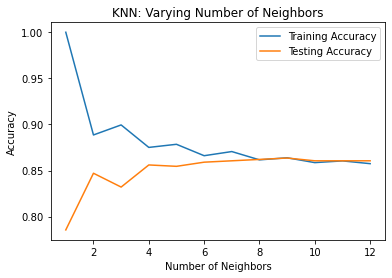

In [9]:

import matplotlib.pyplot as plt
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()